In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
path = r"/content/50_Startups.csv"

In [ ]:
dataset = pd.read_csv(path)

In [ ]:
dataset['State'] = dataset['State'].astype('category')
dummy_states = pd.get_dummies(dataset['State'], drop_first=True)
dataset = pd.concat([dataset, dummy_states], axis=1)
dataset.drop(columns=['State'], inplace=True)

In [ ]:
X = dataset.drop('Profit', axis=1)
y = dataset['Profit']

In [ ]:
model_1 = sm.OLS(y, sm.add_constant(X)).fit()
print("Model 1 (No transformation) - R-squared:", model_1.rsquared)

Model 1 (No transformation) - R-squared: 0.9507524843355148


In [ ]:
model_2 = sm.OLS(y, sm.add_constant(np.log1p(X))).fit()
print("Model 2 (Logarithmic transformation) - R-squared:", model_2.rsquared)

Model 2 (Logarithmic transformation) - R-squared: 0.5370248112902614


In [ ]:
model_3 = sm.OLS(y, sm.add_constant(np.sqrt(X))).fit()
print("Model 3 (Square root transformation) - R-squared:", model_3.rsquared)

Model 3 (Square root transformation) - R-squared: 0.9085136338382949


In [ ]:
X_boxcox = X.apply(lambda x: stats.boxcox(x + 1)[0])
model_4 = sm.OLS(y, sm.add_constant(X_boxcox)).fit()
print("Model 4 (Box-Cox transformation) - R-squared:", model_4.rsquared)

Model 4 (Box-Cox transformation) - R-squared: 0.9230715744126106


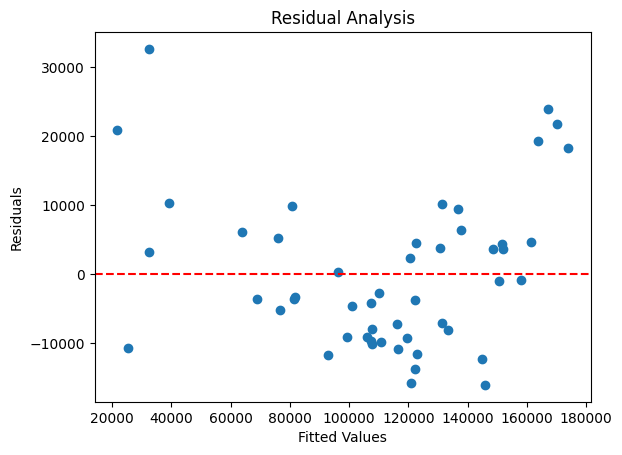

In [ ]:
model_residuals = model_4.resid
plt.scatter(model_4.fittedvalues, model_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

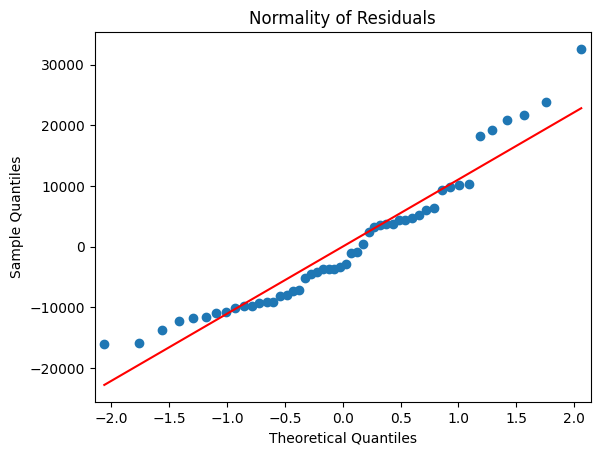

In [ ]:
sm.qqplot(model_residuals, line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normality of Residuals')
plt.show()

In [ ]:
transformed_columns = X_boxcox.columns
X_no_boxcox = X.drop(columns=transformed_columns)

In [ ]:
if X_no_boxcox.shape[1] > 0:
    corr_matrix = X_no_boxcox.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Collinearity Heatmap')
    plt.show()
else:
    print('No columns remaining after Box-Cox transformation')

No columns remaining after Box-Cox transformation


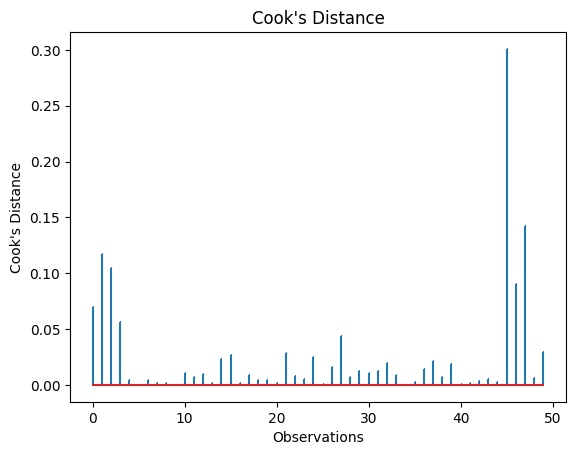

In [ ]:
influence = model_4.get_influence()
cooks_distance = influence.cooks_distance[0]
plt.stem(np.arange(len(X)), cooks_distance, markerfmt=",")
plt.xlabel('Observations')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance")
plt.show()